In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from nrclex import NRCLex
import re
from googletrans import Translator


In [6]:
image_folder_path = "C:/Users/louis/github_vs/113_data/"

years = os.listdir(image_folder_path)
post_chat = years[5]
pre_chat = years[6]
years = years[0:5]
print(years)


['2017', '2018', '2019', '2020', '2021']


In [ ]:

df_all = pd.DataFrame(columns =['event_id', 'message_id', 'user_handle', 'sec_since_start']);
for y in years:
    
    events =  os.listdir(image_folder_path+y)

    for e in events:
        df = pd.read_csv(image_folder_path+y+'/'+e+'/'+"message_info.tsv",sep= '\t')
        df["id"] = df["event_id"].astype("string") + df["message_id"].astype("string")
        df=df.set_index("id")
        df_all = df_all.merge(df, how = "outer")


In [53]:
# group by the messages by conversation
df_all = df_all.groupby("event_id")

In [63]:
# total number of conversations
print(len(df_all))

166685


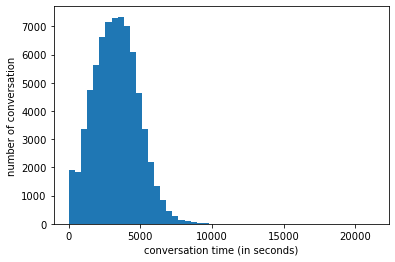

In [67]:
# plot the conversation length
event_lengths = []

for name, group in df_all:
    event_lengths.append(np.max(group["sec_since_start"]))

a =plt.hist(x =event_lengths, bins = 50)
plt.xlabel("conversation time (in seconds)")
plt.ylabel("number of conversation")
plt.show()

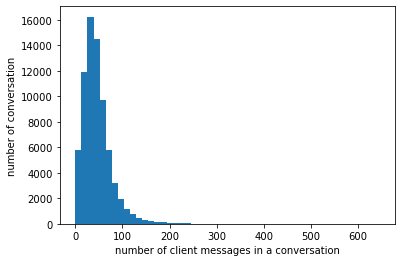

In [70]:
# plot the number of messages per conversation
client_messages = []

for name, group in df_all:
    client_messages.append(len(group[group["user_handle"]== "client"]))
    
a =plt.hist(x =client_messages, bins = 50)
plt.xlabel("number of client messages in a conversation")
plt.ylabel("number of conversation")
plt.show()

In [73]:
print("correlation between conversation time and message number",str(np.corrcoef(event_lengths, client_messages)[0,1]))
# obviously, the longer the conversation is, the more likely it is that they are more messages from the client

correlation between conversation time and message number 0.635961507054393


In [63]:
# for y in years:
    
events =  os.listdir(image_folder_path+years[0])

# for e in events:
# do stuff here for all the years and events. Unfortunately, the data is too heavy to be put in the same df

df = pd.read_csv(image_folder_path+years[0]+'/'+events[0]+'/'+"CDS_results.tsv",sep= '\t')
df["id"] = df["event_id"].astype("string") + df["message_id"].astype("string")
df=df.set_index("id")
df.drop(['event_id','message_id'],axis=1,inplace=True)


In [64]:
translator = Translator()

# regex formatting and translation of the columns
cols = df.columns
cols_en = []

for col in df.columns:
    col_en = [col+';']
    for b in re.findall('\(.*?\)', col):
        bz = b.replace('(','').replace(')','')
        if "+" in b: # removing the expression ( .+| )
            a = []
            [a.append(c.replace(b," ")) for c in col_en]
            col_en = a
        elif '|' in b: # creating a pair of expressions, one with the first part and one with the second part
            l = bz.split('|')[0]
            ls = []
            [ls.append(c.replace(b,l)) for c in col_en]
            r = bz.split('|')[1]
            rs = []
            [rs.append(c.replace(b,r)) for c in col_en]
            
            col_en = ls + rs
        else: # creating a pair of expressions, one with the string within the brackets and one without
            ls = []
            [ls.append(c.replace(b,bz)) for c in col_en]
            rs = []
            [rs.append(c.replace(b,"")) for c in col_en]
            col_en = ls + rs
            
    concat = " ".join(col_en) 
    cols_en.append( translator.translate(concat,src='nl').text ) # translating the different expressions

df.columns = cols_en

In [24]:
# pre/post chat questions data
df_post= pd.read_csv(image_folder_path+"postchat_questions.tsv",sep= '\t').dropna()
df_post = df_post.set_index("event_id")
df_pre = pd.read_csv(image_folder_path+"prechat_questions.tsv",sep= '\t').dropna()
df_pre = df_pre.set_index("event_id")
df_diff = df_pre - df_post
df_diff = df_diff.dropna()

In [25]:
df_diff

,Ik heb de neiging om mezelf te doden,Ik kan mijn pijn niet meer aan,Ik ben in staat om mezelf dood te maken,Ik ben een last voor anderen,Ik heb het gevoel dat ik vast zit,Ik heb de wil om te leven,Ik ben hopeloos,Ik hoor nergens bij,Ik heb het gevoel dat ik opgegeven heb
event_id,,,,,,,,,
cl000003,2.0,2.0,2.0,0.0,3.0,0.0,2.0,1.0,0.0
cl000006,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,1.0,1.0
cl000031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cl000037,1.0,1.0,1.0,1.0,3.0,-3.0,3.0,2.0,2.0
cl000044,3.0,3.0,0.0,4.0,3.0,-3.0,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...
cl024825,3.0,2.0,3.0,2.0,2.0,0.0,4.0,3.0,4.0
cl024829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cl024834,1.0,1.0,0.0,1.0,1.0,-1.0,2.0,2.0,1.0


In [35]:
df_diff.describe()

,Ik heb de neiging om mezelf te doden,Ik kan mijn pijn niet meer aan,Ik ben in staat om mezelf dood te maken,Ik ben een last voor anderen,Ik heb het gevoel dat ik vast zit,Ik heb de wil om te leven,Ik ben hopeloos,Ik hoor nergens bij,Ik heb het gevoel dat ik opgegeven heb
count,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000,3603.000000
mean,1.155981,0.923120,0.817652,0.867055,1.151818,-0.686650,1.320011,0.685817,0.986678
std,1.664732,1.665346,1.588339,1.654274,1.659522,1.661802,1.717082,1.543047,1.739836
min,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [26]:
all_corrs = df_diff.corr()

all_corrs_list = []
i = 0;
for col in all_corrs.columns:
    i+=1;
    for row in all_corrs.index[i:]:
            all_corrs_list.append((col, row, abs(all_corrs[col][row])))
        
sorted_list = list(sorted(all_corrs_list,key = lambda i: i[2]))

In [34]:
print("See if there are any uncorrelated responses")
for i in range(len(sorted_list)-5,len(sorted_list)):
    print(sorted_list[len(sorted_list)-i])

See if there are any uncorrelated responses
('Ik ben in staat om mezelf dood te maken', 'Ik heb de wil om te leven', 0.294623311132407)
('Ik heb de wil om te leven', 'Ik ben hopeloos', 0.27167336827107536)
('Ik heb het gevoel dat ik vast zit', 'Ik heb de wil om te leven', 0.2704364188483579)
('Ik ben een last voor anderen', 'Ik heb de wil om te leven', 0.24508819378290497)
('Ik kan mijn pijn niet meer aan', 'Ik heb de wil om te leven', 0.233858182852709)


In [33]:
print("See if there are any correlated responses")
for i in range(1,6):
    print(sorted_list[len(sorted_list)-i])

See if there are any correlated responses
('Ik heb de neiging om mezelf te doden', 'Ik ben in staat om mezelf dood te maken', 0.6726487188279244)
('Ik heb het gevoel dat ik vast zit', 'Ik heb het gevoel dat ik opgegeven heb', 0.6558904216400067)
('Ik kan mijn pijn niet meer aan', 'Ik ben hopeloos', 0.6528751080022416)
('Ik heb het gevoel dat ik vast zit', 'Ik ben hopeloos', 0.6448692664426627)
('Ik ben een last voor anderen', 'Ik ben hopeloos', 0.6100027689847964)
